In [1]:
import os
import os.path

In [2]:
os.listdir()

['codebook.xlsx',
 'Lab 3 guide.pdf',
 'test.csv',
 'train.csv',
 'lab3.ipynb',
 '.ipynb_checkpoints']

In [3]:
import pandas as pd

In [4]:
# codebook
codebook = pd.read_excel("codebook.xlsx")
codebook

,Variable name,Variable description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has toilet in the household
...,...,...
136,SQBhogar_nin,hogar_nin squared
137,SQBovercrowding,overcrowding squared
138,SQBdependency,dependency squared
139,SQBmeaned,meaned squared


In [5]:
def check_description(codebook, variable_name):
    """
    print description of variable_name
    """
    print(codebook['Variable description'][codebook['Variable name'] == variable_name])

## Part1: Understanding and defining the problem
- The goal of this task is to predict the poverty level for each household.

#### Q1. Define the machine learning problem of this problem

    A1: Supervised learning and classification

#### Q2. Explain the meaning of the target and the categories of the target 
- Target: ordinal variable indicating groups of income level
- categories of the target: 1~4
 - 1: extreme poverty
 - 2: moderate poverty
 - 3: vulnerable households
 - 4: non-vulnerable households

In [6]:
train_csv = pd.read_csv("./train.csv")
train_csv

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


#### Q3. Determine what methods can be done to get the prediction for each household, and not for each individual.
```Python
household_csv = train_csv[train_csv['parentesco1'] == 1]
```

In [7]:
def check_keyword(codebook, keyword):
    """
    check key-words if 'keyword' in description or not
    """
    for idx, description in enumerate(codebook['Variable description'].values.tolist()):
        if keyword in description:
            print(codebook.iloc[idx], end="\n\n")

In [8]:
def check_code(codebook, keyword):
    """
    check key-words if 'keyword' in code or not
    """
    for idx, code in enumerate(codebook['Variable name'].values.tolist()):
        if keyword in code:
            print(codebook.iloc[idx], end="\n\n")

In [9]:
check_code(codebook, 'parentesco')

Variable name                    parentesco1
Variable description    =1 if household head
Name: 82, dtype: object

Variable name                    parentesco2
Variable description    =1 if spouse/partner
Name: 83, dtype: object

Variable name                  parentesco3
Variable description    =1 if son/doughter
Name: 84, dtype: object

Variable name                      parentesco4
Variable description    =1 if stepson/doughter
Name: 85, dtype: object

Variable name                         parentesco5
Variable description    =1 if son/doughter in law
Name: 86, dtype: object

Variable name                       parentesco6
Variable description    =1 if grandson/doughter
Name: 87, dtype: object

Variable name                   parentesco7
Variable description    =1 if mother/father
Name: 88, dtype: object

Variable name                          parentesco8
Variable description    =1 if father/mother in law
Name: 89, dtype: object

Variable name                    parentesco9
Variable 

In [10]:
check_description(codebook, "parentesco1")

82    =1 if household head
Name: Variable description, dtype: object


In [11]:
check_description(codebook, "parentesco2")

83    =1 if spouse/partner
Name: Variable description, dtype: object


In [12]:
check_keyword(codebook, "no head") # parentesco1: 1 if household head

#### Q4. Some individuals belong to the label "no head of household". Determine what should be done with these individuals.
- count number of individuals who belong to "no head of household"
- if number of them is negligible, ignore it
- I think the individual who has no 1 in the columns named parentesco*
- This number is 0, so we can keep going

In [13]:
# length of individuals
print(len(train_csv))

# number of individuals who belong to the household
total_sum = 0
for i in range(1,13):
    total_sum += train_csv['parentesco{0}'.format(i)].sum()
print(total_sum)

print("no head of household: ", len(train_csv) - total_sum)

9557
9557
no head of household:  0


In [14]:
check_code(codebook, "idhogar")

Variable name                              idhogar
Variable description    Household level identifier
Name: 94, dtype: object



In [15]:
check_code(codebook, 'dependency')

Variable name                dependency
Variable description    Dependency rate
Name: 99, dtype: object

Variable name                SQBdependency
Variable description    dependency squared
Name: 138, dtype: object



In [16]:
train_household_csv = train_csv[train_csv['parentesco1'] == 1]

#### Q5. Identify the features that seem important just by reading their definitions.
- v2a1: Monthily rent payment
- rooms: number of all rooms in the house
- r4t3: total persons in the household
- tamhog: size of the household
- hhsize: household size
- overcrowding: number of person per room
- etc.

## Part1: Data exploration
- After reading the train and test data, we have to explore the dataset.

#### Q1. Identify the shapes of the train and test dataset.
- train: (2973, 143)
- test: (7334, 142)

In [17]:
test_household_csv = pd.read_csv("./test.csv")
test_household_csv = test_household_csv[test_household_csv['parentesco1'] == 1]
train_household_csv.shape, test_household_csv.shape

((2973, 143), (7334, 142))

#### Q2. Identify, print, and explain the distribution of the target in both train and test datasets
- test dataset doesn't have target
- In train dataset, non-vulnerable households are dominant poverty level 

In [18]:
target_dist = {
    "extreme poverty": 0,
    "moderate poverty": 0,
    "vulnerable households": 0,
    "non-vulnerable households": 0
}

label2id = {
    1:"extreme poverty",
    2:"moderate poverty",
    3:"vulnerable households",
    4:"non-vulnerable households"
}

for label in train_household_csv['Target'].values:
    target_id = label2id[label]
    target_dist[target_id] = target_dist[target_id] + 1
    
target_dist

{'extreme poverty': 222,
 'moderate poverty': 442,
 'vulnerable households': 355,
 'non-vulnerable households': 1954}

In [19]:
pd.Series(target_dist)

extreme poverty               222
moderate poverty              442
vulnerable households         355
non-vulnerable households    1954
dtype: int64

<BarContainer object of 4 artists>

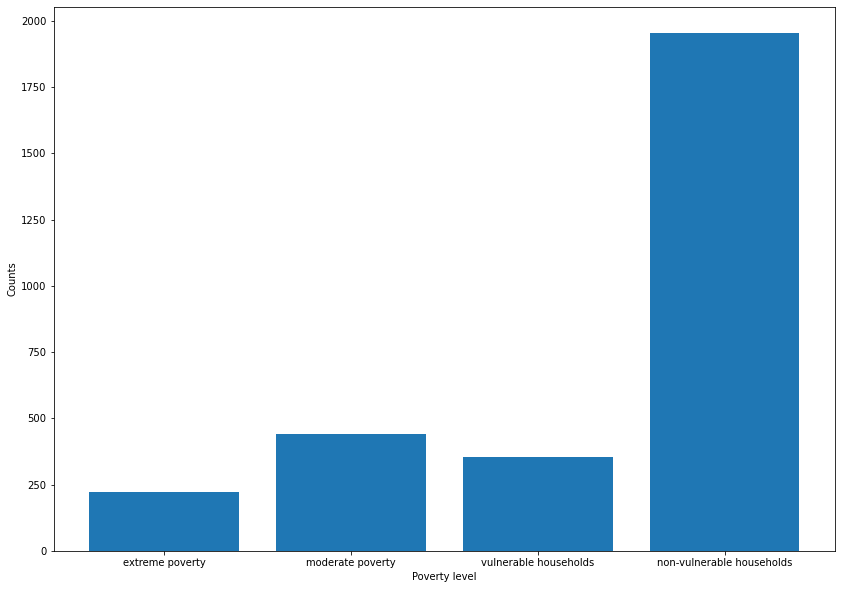

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,10))
plt.xlabel('Poverty level')
plt.ylabel('Counts')
plt.bar(target_dist.keys(), pd.Series(target_dist))

#### Q3. Using the important features you selected in the previous section, determine the various distributions and statstics of those selected features. Determine if the results strengthen your selection.
- v2a1: Monthily rent payment
- rooms: number of all rooms in the house
- r4t3: total persons in the household
- tamhog: size of the household
- hhsize: household size
- overcrowding: number of person per room

Most of feaetures shows distribution that shows specific shape, and got outlier and noises.

(array([ 99., 174., 167., 137.,  71.,  43.,  38.,  23.,  15.,  12.,   9.,
          5.,  12.,   1.,   3.,   0.,   2.,   0.,   3.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0.  ,   47069.54,   94139.08,  141208.62,  188278.16,
         235347.7 ,  282417.24,  329486.78,  376556.32,  423625.86,
         470695.4 ,  517764.94,  564834.48,  611904.02,  658973.56,
         706043.1 ,  753112.64,  800182.18,  847251.72,  894321.26,
         941390.8 ,  988460.34, 1035529.88, 1082599.42, 1129668.96,
        1176738.5 , 1223808.04, 1270877.58, 1317947.12, 1365016.66,
        1412086.2 , 1459155.74, 1506225.28, 1553294.82, 1600364.36,
        1647433.9 , 1694503.44, 1741572.98, 1788642.52, 1835712.06,
        1882781.6 , 1929851.14, 1976920.68, 2023990.22, 2071059.76,
        2118129.3 , 2165198.84, 2212268.38, 22

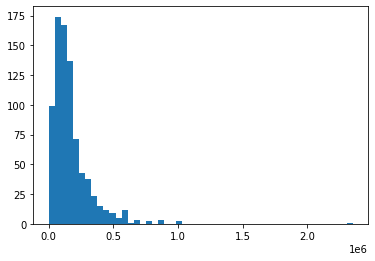

In [21]:
plt.hist(train_household_csv['v2a1'].dropna(), bins=50)

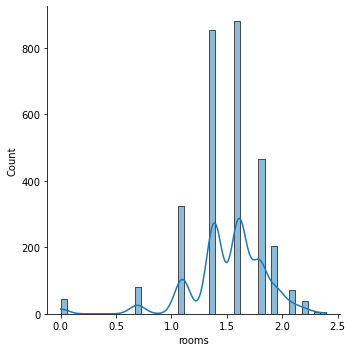

In [22]:
import seaborn as sns
sns.displot(np.log(train_household_csv['rooms'].dropna()), kde=True)

(array([378.,   0.,   0.,   0., 682.,   0.,   0.,   0., 756.,   0.,   0.,
          0., 612.,   0.,   0.,   0., 320.,   0.,   0.,   0., 137.,   0.,
          0.,   0.,   0.,  53.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,
         10.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.24,  1.48,  1.72,  1.96,  2.2 ,  2.44,  2.68,  2.92,
         3.16,  3.4 ,  3.64,  3.88,  4.12,  4.36,  4.6 ,  4.84,  5.08,
         5.32,  5.56,  5.8 ,  6.04,  6.28,  6.52,  6.76,  7.  ,  7.24,
         7.48,  7.72,  7.96,  8.2 ,  8.44,  8.68,  8.92,  9.16,  9.4 ,
         9.64,  9.88, 10.12, 10.36, 10.6 , 10.84, 11.08, 11.32, 11.56,
        11.8 , 12.04, 12.28, 12.52, 12.76, 13.  ]),
 <BarContainer object of 50 artists>)

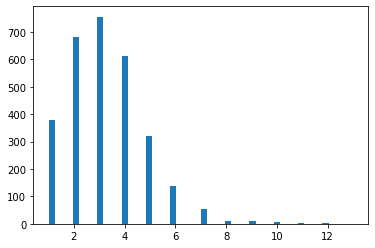

In [23]:
plt.hist(train_household_csv['r4t3'].dropna(), bins=50)

(array([386.,   0.,   0.,   0., 682.,   0.,   0.,   0., 753.,   0.,   0.,
          0., 612.,   0.,   0.,   0., 317.,   0.,   0.,   0., 136.,   0.,
          0.,   0.,   0.,  52.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,
         10.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.24,  1.48,  1.72,  1.96,  2.2 ,  2.44,  2.68,  2.92,
         3.16,  3.4 ,  3.64,  3.88,  4.12,  4.36,  4.6 ,  4.84,  5.08,
         5.32,  5.56,  5.8 ,  6.04,  6.28,  6.52,  6.76,  7.  ,  7.24,
         7.48,  7.72,  7.96,  8.2 ,  8.44,  8.68,  8.92,  9.16,  9.4 ,
         9.64,  9.88, 10.12, 10.36, 10.6 , 10.84, 11.08, 11.32, 11.56,
        11.8 , 12.04, 12.28, 12.52, 12.76, 13.  ]),
 <BarContainer object of 50 artists>)

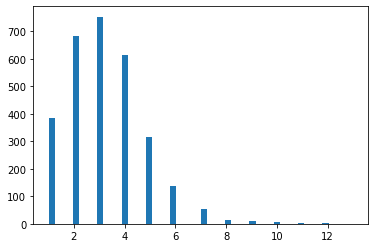

In [24]:
plt.hist(train_household_csv['tamhog'].dropna(), bins=50)

(array([386.,   0.,   0.,   0., 682.,   0.,   0.,   0., 753.,   0.,   0.,
          0., 612.,   0.,   0.,   0., 317.,   0.,   0.,   0., 136.,   0.,
          0.,   0.,   0.,  52.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,
         10.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.24,  1.48,  1.72,  1.96,  2.2 ,  2.44,  2.68,  2.92,
         3.16,  3.4 ,  3.64,  3.88,  4.12,  4.36,  4.6 ,  4.84,  5.08,
         5.32,  5.56,  5.8 ,  6.04,  6.28,  6.52,  6.76,  7.  ,  7.24,
         7.48,  7.72,  7.96,  8.2 ,  8.44,  8.68,  8.92,  9.16,  9.4 ,
         9.64,  9.88, 10.12, 10.36, 10.6 , 10.84, 11.08, 11.32, 11.56,
        11.8 , 12.04, 12.28, 12.52, 12.76, 13.  ]),
 <BarContainer object of 50 artists>)

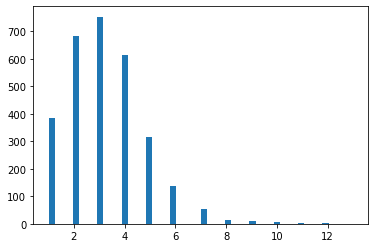

In [25]:
# tamhog == hhsize
plt.hist(train_household_csv['hhsize'].dropna(), bins=50)

(array([ 77., 217., 260.,  16., 839., 369., 362., 166.,  24., 370.,   4.,
        105.,   4.,   0.,  99.,   0.,   4.,   7.,   0.,  25.,   0.,   4.,
          1.,   0.,  12.,   0.,   0.,   2.,   0.,   6.]),
 array([0.2       , 0.39333333, 0.58666667, 0.78      , 0.97333333,
        1.16666667, 1.36      , 1.55333333, 1.74666667, 1.94      ,
        2.13333333, 2.32666667, 2.52      , 2.71333333, 2.90666667,
        3.1       , 3.29333333, 3.48666667, 3.68      , 3.87333333,
        4.06666667, 4.26      , 4.45333333, 4.64666667, 4.84      ,
        5.03333333, 5.22666667, 5.42      , 5.61333333, 5.80666667,
        6.        ]),
 <BarContainer object of 30 artists>)

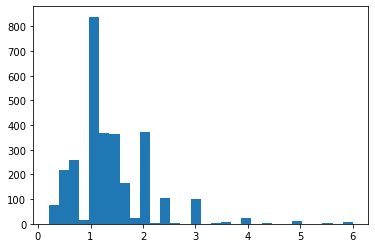

In [26]:
plt.hist(train_household_csv['overcrowding'].dropna(), bins=30)

#### Q4. Create a correlation matrix and determine which features are most correlated with the target. Explain and discuss the findings.
- escolari
- meaneduc
- SQBescolari
- cielorazo
- eviv3
- epared3
- SQBmeaned
- pisomoscer
- etecho3
- v2a1

Poverty level is highly correlated with educations.

In [27]:
corrmat = train_household_csv.corr()

In [28]:
cols = corrmat.nlargest(11, 'Target')
cols.Target

Target         1.000000
escolari       0.333791
meaneduc       0.333652
SQBescolari    0.314397
cielorazo      0.295249
eviv3          0.293540
epared3        0.280947
SQBmeaned      0.276251
pisomoscer     0.275452
etecho3        0.261142
v2a1           0.259938
Name: Target, dtype: float64

<AxesSubplot:>

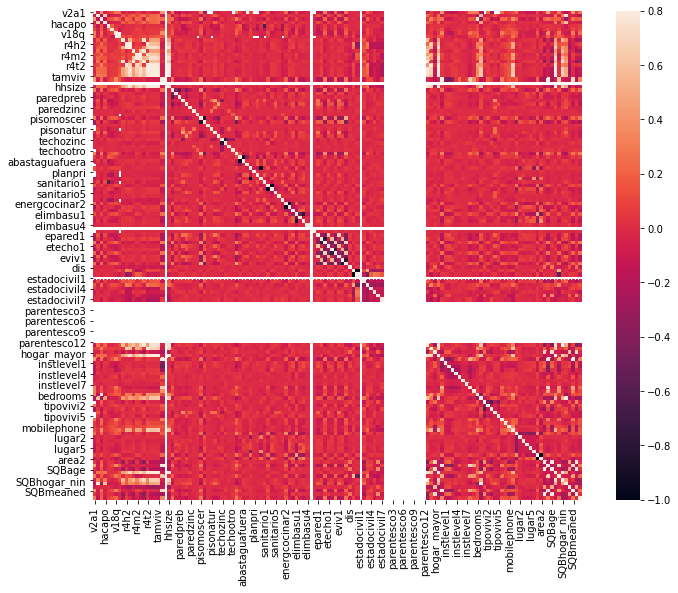

In [29]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
# 색이 흰 색에 가까울 수록 상관관계가 높음

#### Q5. Determine if there are any possible outliers?
- Yes. In v2a1, outlier exists.

In [30]:
cor_feature = cols.index
cor_feature

Index(['Target', 'escolari', 'meaneduc', 'SQBescolari', 'cielorazo', 'eviv3',
       'epared3', 'SQBmeaned', 'pisomoscer', 'etecho3', 'v2a1'],
      dtype='object')

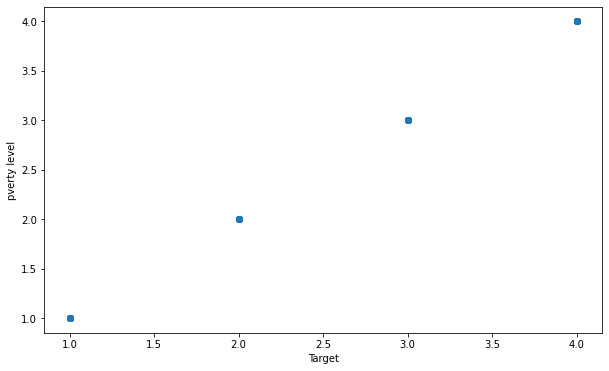

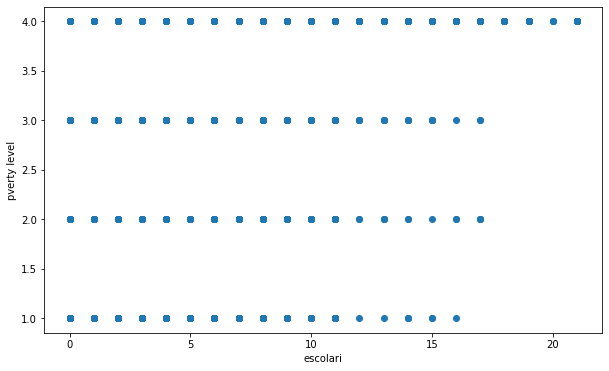

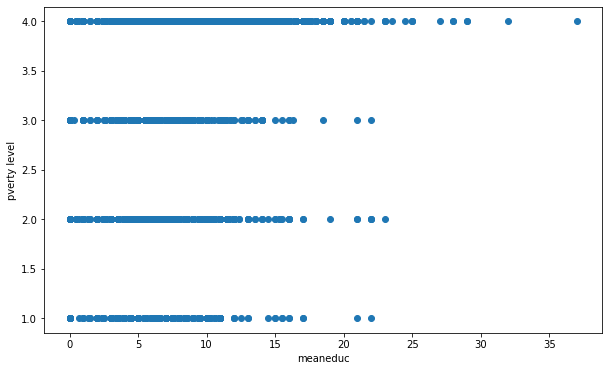

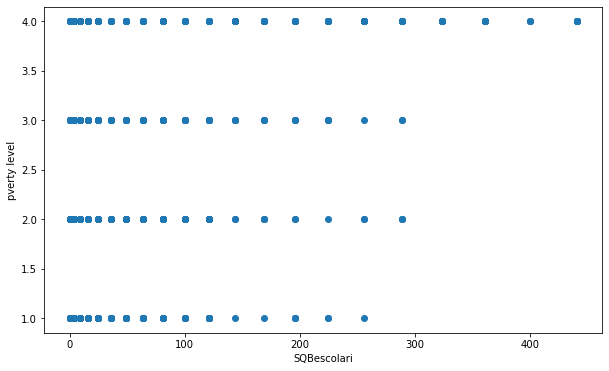

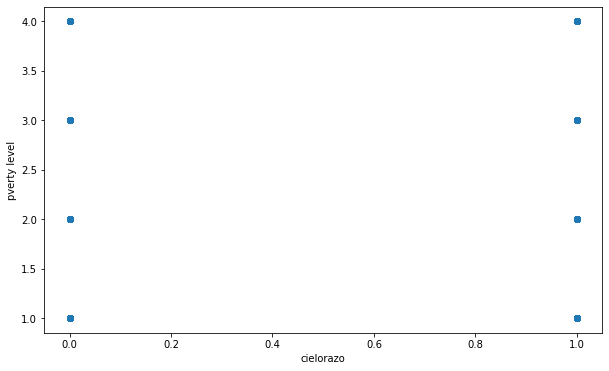

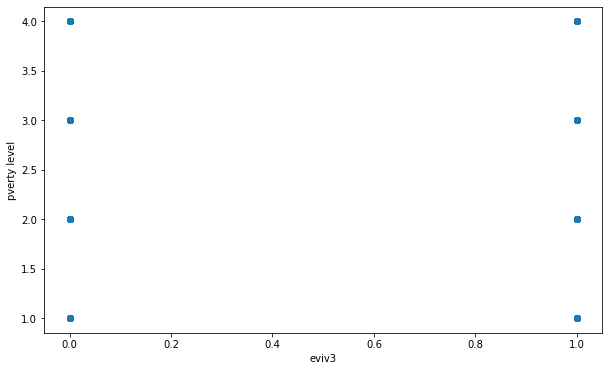

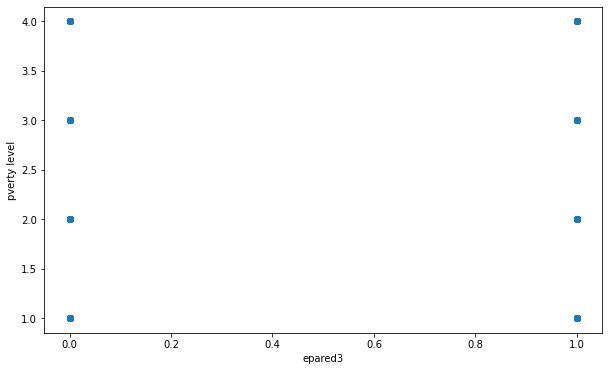

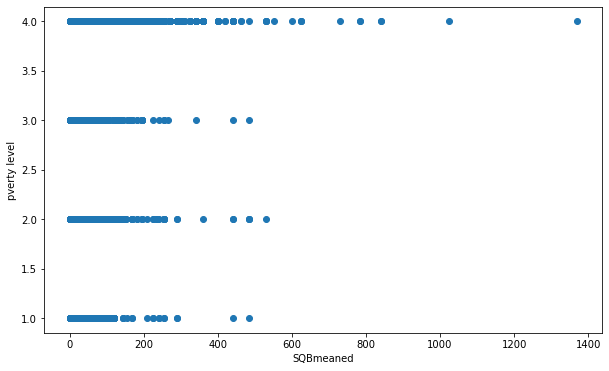

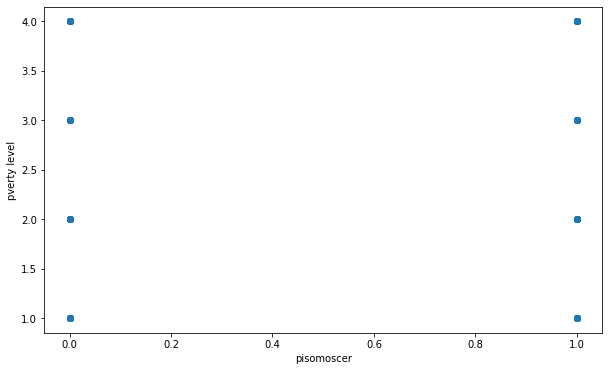

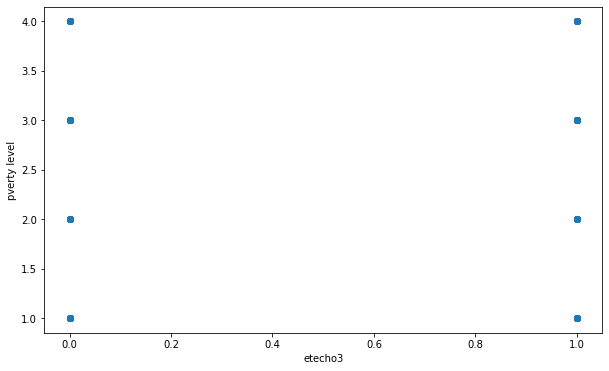

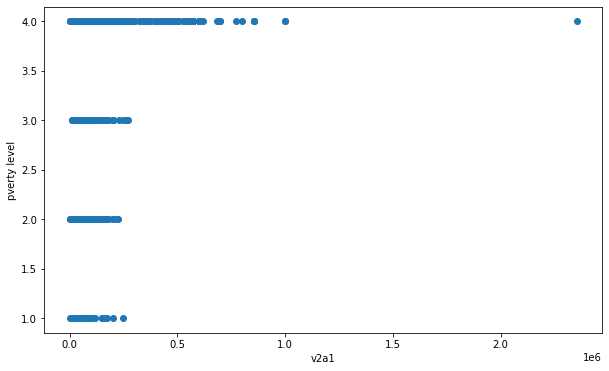

In [31]:
for var in cor_feature:
    plt.figure(figsize=(10,6))
    plt.xlabel(var)
    plt.ylabel("pverty level")
    plt.scatter(train_household_csv[var], train_household_csv['Target'])

## Part3: Data preprocessing

#### Q1. Determine how the outliers should be handled.
- The outliers would be excluded because it effects to a model like a noise

#### Q2. Explore if there are any missing values in the data
- Yes. There are missing values in the data
- rez_esc, v18q1, v2a1 has more than 2,000 missing values

In [32]:
train_household_csv.isna().sum().sort_values(ascending=False).head(10)

rez_esc           2972
v18q1             2318
v2a1              2156
meaneduc             3
SQBmeaned            3
techozinc            0
techoentrepiso       0
techocane            0
techootro            0
cielorazo            0
dtype: int64

#### Q3. Determine how these missing values should be handled.
- Too many missing values would be noise. So, exclude these top three features

In [33]:
train_household_csv = train_household_csv.drop(['rez_esc', 'v18q1', 'v2a1'], axis=1)

In [34]:
train_household_csv = train_household_csv.dropna()
train_household_csv

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.000000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.000000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.000000,121.0000,8464,4
5,ID_ec05b1a7b,0,5,0,1,1,1,0,2,2,...,121,1444,16,121,4,1.777778,1.000000,121.0000,1444,4
8,ID_1284f8aad,1,2,0,1,1,0,0,1,1,...,81,900,16,81,4,16.000000,1.000000,100.0000,900,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,ID_18b0a845b,0,4,0,1,0,0,1,1,2,...,25,676,25,0,9,6.250000,2.250000,20.2500,676,1
9541,ID_a31274054,0,3,0,0,0,0,2,2,4,...,4,1600,25,4,9,6.250000,2.250000,16.0000,1600,2
9545,ID_32a00a8bf,0,5,0,1,1,0,1,2,3,...,4,2025,25,4,4,5.444444,0.444444,100.0000,2025,4
9551,ID_79d39dddc,0,3,0,1,1,0,0,1,1,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2


#### Q4. Determine if some features need some labelling. Are there any other conversion of representaion needed?
- One-hot-encoding to scalar number
- But categorical features shows low correlation ratio

#### Q5. Determine if some feature engineering can be done and perform them as determined.
- Change distribution by applying logarithms
- After check machine performance, it would be considered

## Part4: Machine learning implementation

#### Q1. Scale that preprocessed data if needed
- SQB means scaling

<AxesSubplot:ylabel='Density'>

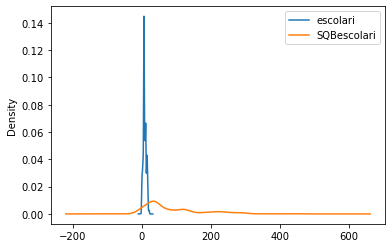

In [35]:
features = ['escolari', 'meaneduc', 'SQBescolari', 'cielorazo', 'eviv3','epared3', 'SQBmeaned', 'pisomoscer', 'etecho3']

train_df = train_household_csv[features]
train_df[['escolari', 'SQBescolari']].plot.kde()

<AxesSubplot:ylabel='Density'>

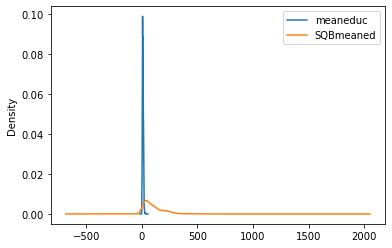

In [36]:
train_df[['meaneduc', 'SQBmeaned']].plot.kde()

#### Q2. Split the data into train and validation sets

In [37]:
from sklearn.model_selection import train_test_split

target_df = train_household_csv['Target']
X_train, X_valid, y_train, y_valid = train_test_split(train_df, target_df, test_size = 0.3)

#### Q3. Determine the machine learning models to be used and perform them. (Apply K-Fold cross validation or any other to improve the results)
- KNN Classifier
- DecisionTreeClassifier
- RandomForestClassifier

## Part5: Performance evaluation

#### Q1. Determine the results

In [38]:
# KNN algorithms
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_valid, y_valid)))

K =  1 -> Score: 52.75%
K =  3 -> Score: 56.79%
K =  5 -> Score: 58.47%
K =  7 -> Score: 61.05%
K =  9 -> Score: 61.62%
K =  11 -> Score: 62.29%
K =  13 -> Score: 63.64%
K =  15 -> Score: 63.08%
K =  17 -> Score: 63.52%
K =  19 -> Score: 64.31%
K =  21 -> Score: 64.65%
K =  23 -> Score: 64.98%
K =  25 -> Score: 65.10%
K =  27 -> Score: 64.65%
K =  29 -> Score: 64.87%


In [67]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Decision Tree -> {:.2%}".format(tree.score(X_valid, y_valid)))

Decision Tree -> 56.68%


In [68]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)    # no. of trees
rfc.fit(X_train, y_train)
print("Random Forest : {:.2%}".format(rfc.score(X_valid, y_valid)))

Random Forest : 59.60%


In [41]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn, train_df, train_household_csv['Target'], cv=5).mean().round(4)

0.6391

In [42]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(tree, train_df, train_household_csv['Target'], cv=5).mean().round(4)

0.5333

In [43]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(rfc, train_df, train_household_csv['Target'], cv=5).mean().round(4)

0.5623

#### Q2. Explain the implementation of the results
- In KNN algorithms, score increase along with number of K
- Among three algorithms, KNN Classifier shows highest performance

#### Q3. Determine if the results are satisfactory, and determine if improvements need to be made.
- Already take higher than 60% of scores
- Model performance has a possibility to improve by decrease number of features.

#### Q4. If improvements need to be made, state the sections that improvements will be made and explain why.

In [44]:
features

['escolari',
 'meaneduc',
 'SQBescolari',
 'cielorazo',
 'eviv3',
 'epared3',
 'SQBmeaned',
 'pisomoscer',
 'etecho3']

In [57]:
d_features = features[:5]
d_features.remove('SQBescolari')
d_features

['escolari', 'meaneduc', 'cielorazo', 'eviv3']

In [58]:
target_df = train_household_csv['Target']
train_df = train_household_csv[d_features]
X_train, X_valid, y_train, y_valid = train_test_split(train_df, target_df, test_size = 0.3)

In [66]:
# KNN algorithms
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_train, y_train)))
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_valid, y_valid)))
    print()

K =  1 -> Score: 74.75%
K =  1 -> Score: 54.32%

K =  3 -> Score: 68.49%
K =  3 -> Score: 58.14%

K =  5 -> Score: 67.53%
K =  5 -> Score: 61.84%

K =  7 -> Score: 68.54%
K =  7 -> Score: 64.20%

K =  9 -> Score: 66.71%
K =  9 -> Score: 63.19%

K =  11 -> Score: 67.10%
K =  11 -> Score: 64.98%

K =  13 -> Score: 66.76%
K =  13 -> Score: 65.77%

K =  15 -> Score: 66.91%
K =  15 -> Score: 65.99%

K =  17 -> Score: 66.33%
K =  17 -> Score: 65.88%

K =  19 -> Score: 66.43%
K =  19 -> Score: 66.55%

K =  21 -> Score: 66.38%
K =  21 -> Score: 66.33%

K =  23 -> Score: 65.95%
K =  23 -> Score: 66.22%

K =  25 -> Score: 66.14%
K =  25 -> Score: 66.22%

K =  27 -> Score: 65.85%
K =  27 -> Score: 65.43%

K =  29 -> Score: 66.04%
K =  29 -> Score: 65.88%



In [70]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Decision Tree (train) {:.2%}".format(tree.score(X_train, y_train)))
print("Decision Tree (valid) {:.2%}".format(tree.score(X_valid, y_valid)))

Decision Tree (train) 78.64%
Decision Tree (valid) 56.34%


In [71]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)    # no. of trees
rfc.fit(X_train, y_train)
print("Random Forest (train) : {:.2%}".format(rfc.score(X_train, y_train)))
print("Random Forest (valid) : {:.2%}".format(rfc.score(X_valid, y_valid)))

Random Forest (train) : 77.87%
Random Forest (valid) : 59.15%


In [72]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors=100)
cross_val_score(knn, train_household_csv[d_features], train_household_csv['Target'], cv=5).mean().round(4)

0.6492

## Part6: Conclusion

#### Q1. Conclude the data science model that you have created
#### Q2. Give thorough discussions
- knn model is simple but show higher performance. Also, I experimented 10 features and shirinked these into 5 features. This decreased model shows higher performances, and I guess the reason is that the correlations top five was just near 0.4 ~ 0.3. So, rest of features impact to the model as noises.
- Secondly, preprocessing was not thorough. I didn't check the top 5 faetures of outliers and didn't get rid of them. These might work as a noises too.